In [3]:
import json
import os
import pandas as pd

In [18]:
import sys
sys.path.insert(1, '../scripts')

sys.path

from functions import create_df_of_requests

In [4]:
df = create_df_of_requests('../data/requests')

df.head()

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed
0,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,395,0.565826,0.221868,False,NaN
1,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,394,0.565826,0.221868,False,NaN
2,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,385,0.565826,0.221868,False,NaN
3,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,384,0.565826,0.221868,False,NaN
4,300,2022-06-17,09:24:16,34f409b3-9f92-4720-9926-48ca1cbf6f90,CreateSequence,390,0.565826,0.221868,False,NaN


In [24]:
from group_locations_helper_functions import group_locations_df

In [6]:
newdf = group_locations_df(df)

newdf.head()

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id
0,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,395,0.565826,0.221868,False,NaN,0
1,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,394,0.565826,0.221868,False,NaN,0
2,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,385,0.565826,0.221868,False,NaN,0
3,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,384,0.565826,0.221868,False,NaN,0
4,300,2022-06-17,09:24:16,34f409b3-9f92-4720-9926-48ca1cbf6f90,CreateSequence,390,0.565826,0.221868,False,NaN,0


In [7]:
from group_locations_helper_functions import add_max_distance_per_loc_id

In [8]:
newdf2 = add_max_distance_per_loc_id(newdf)

newdf2.head()

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id,max_group_distance_m
0,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,395,0.565826,0.221868,False,NaN,0,0.0
1,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,394,0.565826,0.221868,False,NaN,0,0.0
2,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,385,0.565826,0.221868,False,NaN,0,0.0
3,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,384,0.565826,0.221868,False,NaN,0,0.0
4,300,2022-06-17,09:24:16,34f409b3-9f92-4720-9926-48ca1cbf6f90,CreateSequence,390,0.565826,0.221868,False,NaN,0,0.0


In [11]:
newdf2.head(150)

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id,max_group_distance_m
0,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,395,0.565826,0.221868,False,NaN,0,0.0
1,300,2022-06-17,05:57:33,41931cd2-8975-4a64-9197-d16abe871bb7,CreateSequence,394,0.565826,0.221868,False,NaN,0,0.0
2,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,385,0.565826,0.221868,False,NaN,0,0.0
3,300,2022-06-17,08:50:02,5737d4ef-23e9-4832-8bb5-24340a176e31,CreateSequence,384,0.565826,0.221868,False,NaN,0,0.0
4,300,2022-06-17,09:24:16,34f409b3-9f92-4720-9926-48ca1cbf6f90,CreateSequence,390,0.565826,0.221868,False,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
145,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64955,0.642867,0.303686,True,134.0,107,0.0
146,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64977,0.642685,0.303240,True,135.0,108,0.0
147,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64986,0.642198,0.302969,True,136.0,109,0.0
148,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64919,0.642220,0.304321,True,137.0,110,0.0


In [10]:
filtered  = newdf2[["loc_id", "lat", "lon", "max_group_distance_m"]].drop_duplicates()

filtered.head(150)

,loc_id,lat,lon,max_group_distance_m
0,0,0.565826,0.221868,0.000000
5,1,0.572716,0.233306,0.000000
7,2,0.564949,0.222236,10.060098
11,3,0.650488,0.296025,0.000000
12,4,0.646361,0.297741,0.000000
...,...,...,...,...
506,145,0.646742,0.304921,0.000000
507,146,0.643197,0.307847,1.265340
508,147,0.647016,0.308574,0.000000
510,148,0.641657,0.308738,0.000000


In [ ]:
newdf.head(50)

In [14]:
newdf2[newdf2['loc_id']==2]

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id,max_group_distance_m
7,300,2022-06-17,12:40:13,b198859d-0df8-4f91-98ea-b9e3231dbb14,CreateSequence,72,0.564949,0.222236,False,NaN,2,10.060098
8,300,2022-06-17,12:42:22,bc7b48ae-4f67-463d-abc2-de921b00181c,CreateSequence,72,0.564949,0.222236,False,NaN,2,10.060098
9,300,2022-06-17,12:55:36,d5348336-27d2-4745-a729-697c7342a1ba,CreateSequence,78,0.564949,0.222236,False,NaN,2,10.060098
10,300,2022-06-17,13:58:01,ec9e5698-f36f-4d7b-bd97-8d53485ba507,CreateSequence,81,0.564949,0.222236,False,NaN,2,10.060098
1361355,663,2022-05-30,06:08:32,080d0b23-544a-4664-8d73-ba26a204b15d,CreateSequence,113230,0.564933,0.222245,False,NaN,2,10.060098
1361462,663,2022-05-30,06:10:24,9953a03b-a654-427c-b5fa-a66873e7a779,CreateSequence,113230,0.564933,0.222245,False,NaN,2,10.060098
1361632,663,2022-05-30,06:11:01,bb9eca15-b6fb-4e6b-8514-a7eb51738ee2,CreateSequence,113230,0.564933,0.222245,False,NaN,2,10.060098
1361802,663,2022-05-30,06:11:56,aadfdfa3-5994-47b7-b3c5-353b74608b06,CreateSequence,113230,0.564933,0.222245,False,NaN,2,10.060098
1361970,663,2022-05-30,06:15:34,c71f13bb-e23a-4bf0-80c7-57ce426d7eb4,EstimateTime,113230,0.564933,0.222245,True,0.0,2,10.060098
1362138,663,2022-05-30,07:37:04,c7e0eaeb-8591-447e-9192-d2aa463f0a57,EstimateTime,113230,0.564933,0.222245,True,0.0,2,10.060098


In [15]:
newdf2.sort_values(by="max_group_distance_m", ascending=[False])

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id,max_group_distance_m
925344,625,2022-06-04,06:49:55,279aa4c6-f785-4f4d-bd6b-8ea3a2255868,EstimateTime,40192,0.630598,0.197905,True,42.0,38733,90.495819
977011,627,2022-06-17,08:27:03,8d9b808c-ba70-4e96-93fd-8f29903040f2,CreateSequence,41549,0.630850,0.197678,False,NaN,38733,90.495819
971906,627,2022-06-08,09:08:00,1c6e36b2-79f6-47ec-bb1e-a9d049177653,CreateSequence,38944,0.630817,0.197705,False,NaN,38733,90.495819
975695,627,2022-06-14,19:12:07,31517133-76ee-4626-b9cc-93627e2850d9,CreateSequence,100,0.631035,0.197522,False,NaN,38733,90.495819
975691,627,2022-06-14,19:12:07,31517133-76ee-4626-b9cc-93627e2850d9,CreateSequence,98,0.630755,0.197739,False,NaN,38733,90.495819
...,...,...,...,...,...,...,...,...,...,...,...,...
2576922,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,148,0.640092,0.311237,True,152.0,120,0.000000
2576923,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,147,0.636873,0.306125,True,153.0,119,0.000000
2576924,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,154,0.648065,0.301981,False,NaN,22,0.000000
2576925,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,155,0.648065,0.301981,False,NaN,22,0.000000


In [23]:
## retry calc distance, now with new function
from group_locations_helper_functions import group_locations_df_v2

ImportError: cannot import name 'group_locations_df_v2' from 'group_locations_helper_functions' (c:\Users\mmylle\Documents\__0_DATA_SCIENCE\Groepswerk\GIT\learning-driver-preferences\notebooks\../scripts\group_locations_helper_functions.py)

## TASK 3

In [13]:
filtered_df = newdf[
    (df["date"] == "2022-05-30") &
    (df["route_id"] == "301")
]
##41931cd2-8975-4a64-9197-d16abe871bb7
filtered_df = filtered_df.sort_values(by="time")

filtered_df

,route_id,date,time,request_id,request_type,task_id,lat,lon,fixed,position_fixed,loc_id
11,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64869,0.650488,0.296025,True,0.0,3
110,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,65021,0.644809,0.310000,True,99.0,81
111,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,65025,0.644863,0.309836,True,100.0,82
112,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64929,0.644928,0.310547,True,101.0,83
113,301,2022-05-30,06:45:38,cb9638db-2817-4ccf-b226-7775c01793a8,EstimateTime,64990,0.644928,0.310547,True,102.0,83
...,...,...,...,...,...,...,...,...,...,...,...
420,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,56,0.647755,0.308013,True,101.0,44
419,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,57,0.647755,0.308013,True,100.0,44
418,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,54,0.647464,0.308223,True,99.0,43
425,301,2022-05-30,19:11:46,a68b6188-e89e-4d5c-8c4a-b82ef7a71a84,AddToSequence,43,0.647447,0.306312,True,106.0,32


<Axes: xlabel='lat'>

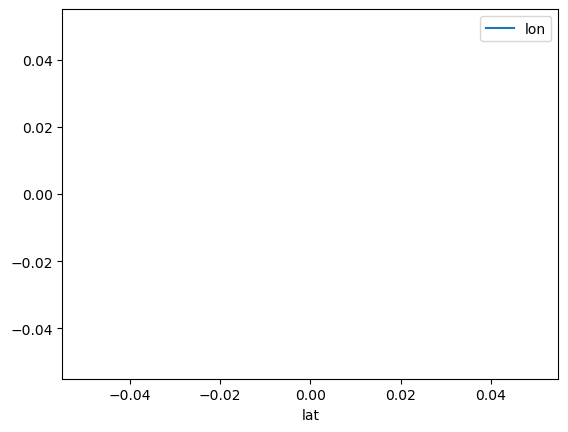

In [ ]:
filtered_df = newdf[
    (df["date"] == "2022-05-30") &
    (df["route_id"] == "301") &
    (df["time"] == "06:45:38")
]
filtered_df = filtered_df.sort_values(by="time")

filtered_df.plot(x = "lat", y = "lon")

## locatie labels toevoegen - dubbelcheck of locaties wel dezelfde zijn


In [ ]:
##filtered_df
##newdf.groupby('loc_id').maximaleafstandbinnengroep
##newdf.groupby('loc_id')[]

## thesde are next steps to check if grouping is actually correct

filtered  = newdf[["loc_id", "lat", "lon", "max_group_distance_m"]].drop_duplicates()

filtered



,loc_id,lat,lon
0,0,0.565826,0.221868
5,1,0.572716,0.233306
7,2,0.564949,0.222236
11,3,0.650488,0.296025
12,4,0.646361,0.297741
...,...,...,...
2573020,100065,0.481522,0.296179
2574501,51299,0.481191,0.296847
2575370,50337,0.488079,0.305585
2575702,50682,0.479680,0.301933


In [19]:
filtered_df = filtered[
    (df["loc_id"] == 21)
]

filtered_df

KeyError: 'loc_id'